Load the full CFPB complaint dataset

In [2]:
import pandas as pd

# Path to the dataset CSV file
data_path = '../data/raw/complaints/complaints.csv'

# Load the dataset into a DataFrame
df = pd.read_csv(data_path)

# Show basic info and first few rows
print(df.info())
print(df.head())


C:\Users\HP\AppData\Local\Temp\ipykernel_20340\690134955.py:7: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9609797 entries, 0 to 9609796
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 1.3+

C:\Users\HP\AppData\Local\Temp\ipykernel_20340\239907669.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


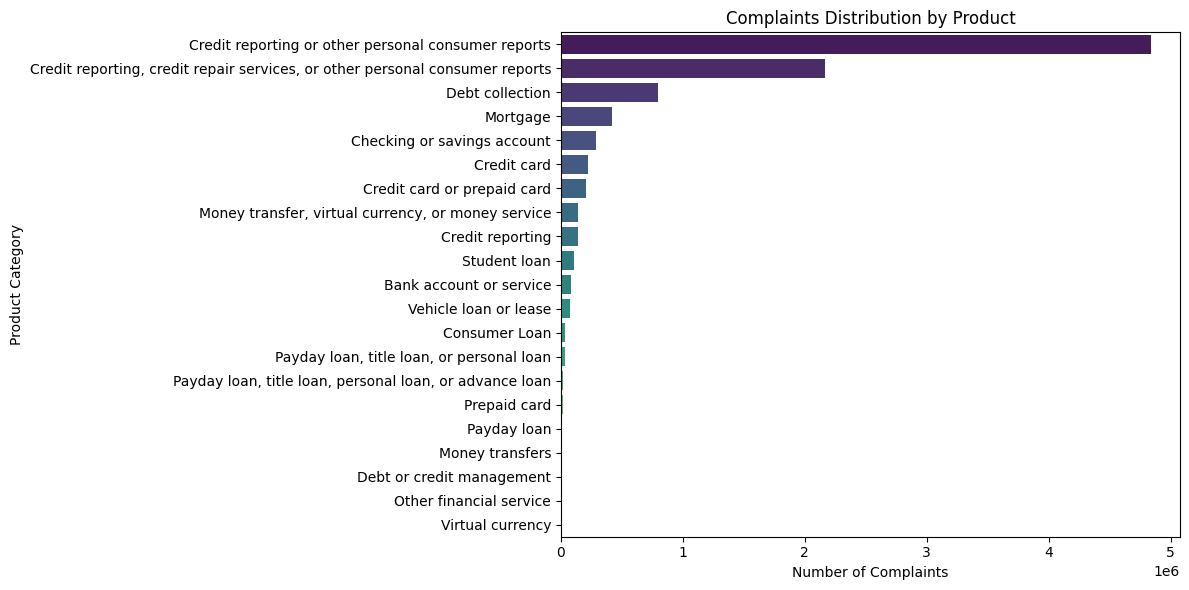

Complaints in target product categories:


Product
Credit card        226686
Money transfers      5354
Name: count, dtype: int64

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# 2a. Product distribution analysis
product_counts = df['Product'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(
    x=product_counts.values, 
    y=product_counts.index,
    palette='viridis'
)
plt.title('Complaints Distribution by Product')
plt.xlabel('Number of Complaints')
plt.ylabel('Product Category')
plt.tight_layout()
plt.savefig('images/product_distribution.png')
plt.show()

# 2b. Check for specified products
target_products = [
    'Credit card', 
    'Personal loan', 
    'Buy Now, Pay Later (BNPL)', 
    'Savings account', 
    'Money transfers'
]

print("Complaints in target product categories:")
display(df[df['Product'].isin(target_products)]['Product'].value_counts())

C:\Users\HP\AppData\Local\Temp\ipykernel_20340\4192545353.py:11: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/raw/complaints/complaints.csv')
C:\Users\HP\AppData\Local\Temp\ipykernel_20340\4192545353.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  product_plot = sns.countplot(


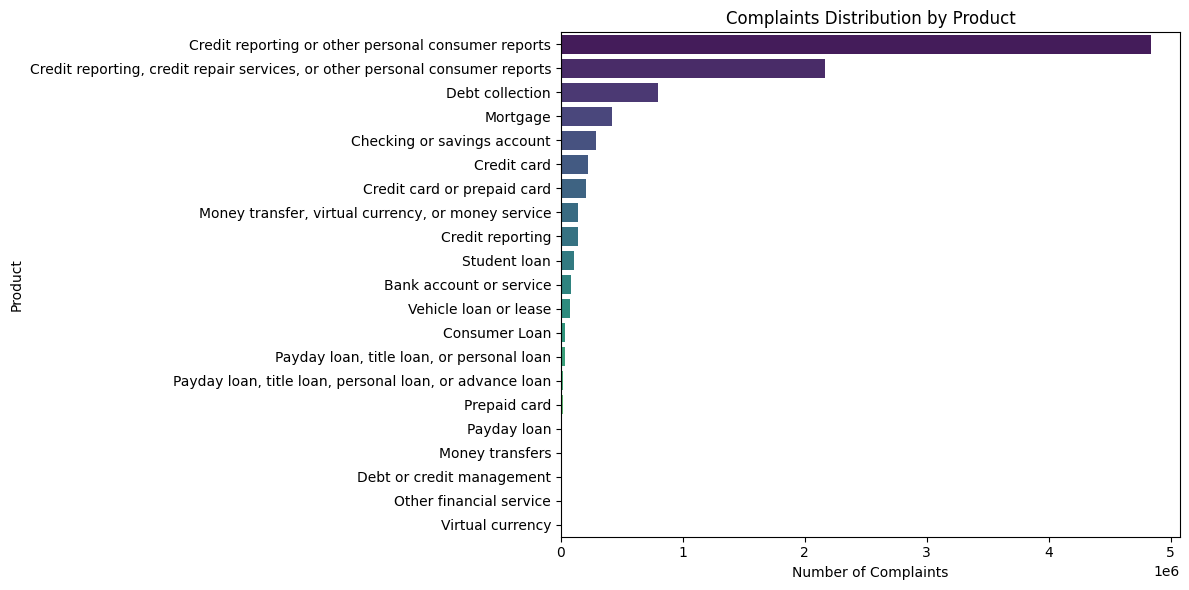

In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Create directory for images if it doesn't exist
os.makedirs('images', exist_ok=True)

# Load the dataset
df = pd.read_csv('../data/raw/complaints/complaints.csv')

# 1. Product distribution analysis
plt.figure(figsize=(12,6))
product_plot = sns.countplot(
    y='Product', 
    data=df,
    order=df['Product'].value_counts().index,
    palette='viridis'
)
plt.title('Complaints Distribution by Product')
plt.xlabel('Number of Complaints')
plt.tight_layout()
plt.savefig('images/product_distribution.png')
plt.show()

Narrative presence analysis

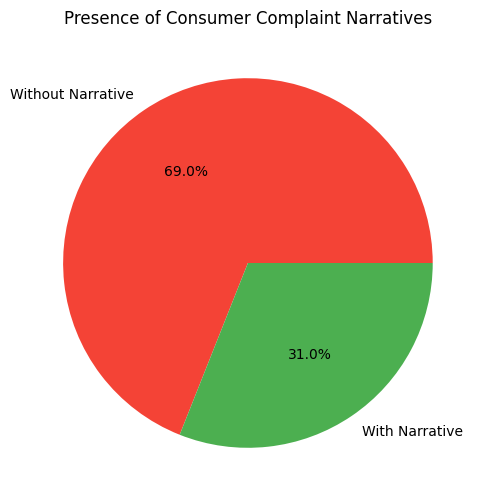

In [8]:
has_narrative = df['Consumer complaint narrative'].notna()
narrative_counts = has_narrative.value_counts()

plt.figure(figsize=(8,6))
plt.pie(
    narrative_counts,
    labels=['Without Narrative', 'With Narrative'],
    autopct='%1.1f%%',
    colors=['#f44336', '#4caf50']
)
plt.title('Presence of Consumer Complaint Narratives')
plt.savefig('images/narrative_presence.png')
plt.show()

3. Narrative length analysis
# Calculate word counts only for narratives that exist

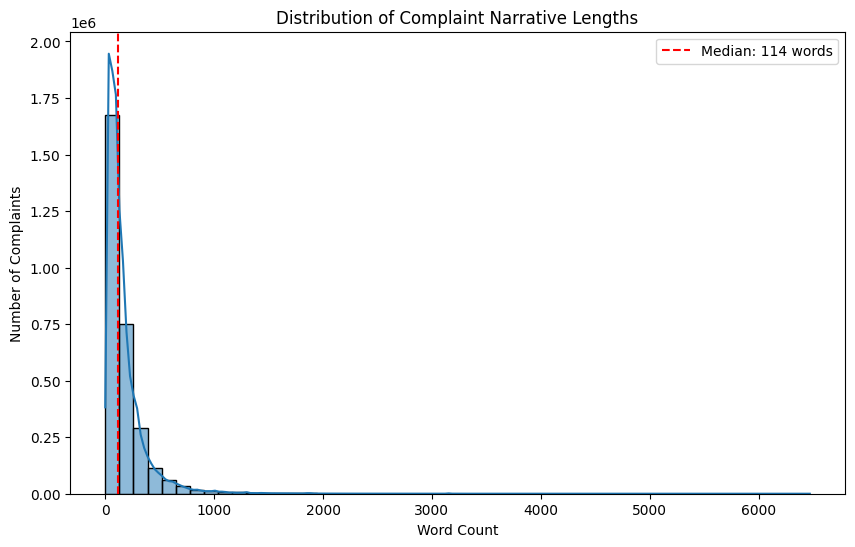

In [9]:
df['word_count'] = df[has_narrative]['Consumer complaint narrative'].apply(
    lambda x: len(str(x).split()) 
)

plt.figure(figsize=(10,6))
sns.histplot(
    df[has_narrative]['word_count'], 
    bins=50,
    kde=True
)
plt.axvline(
    x=df[has_narrative]['word_count'].median(), 
    color='r', 
    linestyle='--', 
    label=f'Median: {df[has_narrative]["word_count"].median():.0f} words'
)
plt.title('Distribution of Complaint Narrative Lengths')
plt.xlabel('Word Count')
plt.ylabel('Number of Complaints')
plt.legend()
plt.savefig('images/narrative_length_distribution.png')
plt.show()

# Filter and clean data

In [10]:
target_products = [
    'Credit card', 
    'Credit card or prepaid card',  # Merge with "Credit card" to avoid splits
    'Personal loan',
    'Payday loan, title loan, or personal loan',  # Merge with "Personal loan"
    'Buy Now, Pay Later (BNPL)', 
    'Savings account',
    'Checking or savings account',  # Merge with "Savings account"
    'Money transfers',
    'Money transfer, virtual currency, or money service'  # Merge with "Money transfers"
]

# Filter for target products and non-empty narratives
filtered_df = df[
    df['Product'].isin(target_products) & 
    has_narrative
].copy()

# Text cleaning function
def clean_text(text):
    text = str(text).lower()  # Lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove special chars
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces
    return text.strip()

# Apply cleaning
filtered_df['clean_narrative'] = filtered_df['Consumer complaint narrative'].apply(clean_text)

# Save filtered data
os.makedirs('data', exist_ok=True)
filtered_df.to_csv('data/filtered_complaints.csv', index=False)

# Print key metrics
print(f"Original dataset size: {len(df)}")
print(f"Filtered dataset size: {len(filtered_df)}")
print(f"Median narrative length: {df[has_narrative]['word_count'].median():.0f} words")
print(f"Complaints with narratives: {narrative_counts[True]} ({narrative_counts[True]/len(df)*100:.1f}%)")
print(f"Top 3 products:\n{df['Product'].value_counts().head(3)}")

Original dataset size: 9609797
Filtered dataset size: 445576
Median narrative length: 114 words
Complaints with narratives: 2980756 (31.0%)
Top 3 products:
Product
Credit reporting or other personal consumer reports                             4834855
Credit reporting, credit repair services, or other personal consumer reports    2163857
Debt collection                                                                  799197
Name: count, dtype: int64
